# <span style = "color:green"> Implementing LSTM neural network with TensorFlow Keras </span>

***

Here, we will use the stock price dataset to build an LSTM in keras that will predict if the stock will go up or down.

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read 'tatatrain.csv'

In [2]:
train = pd.read_csv('tatatrain.csv')

### View head

In [3]:
train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


### Check the shape of the dataset

In [4]:
train.shape

(2035, 8)

### We only need 'Open' feature in our dataset, Remove the rest

Open column represent the starting price of the stock for the day

In [5]:
train_data = train[['Open']]

### Plot Open price 

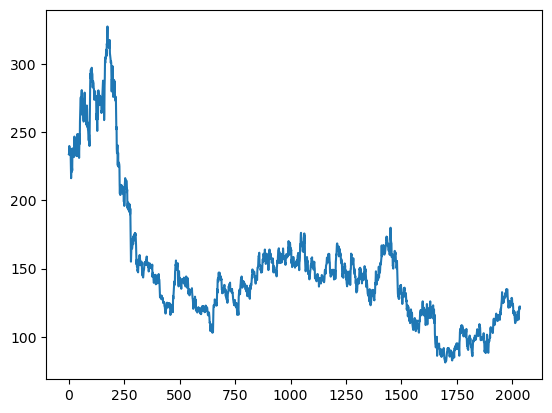

In [6]:
plt.plot(train_data)

### Scale the data with MinMaxScaler

To produce the best-optimized results with the models, we are required to scale the data, For this task, we are leveraging scikit-learn library's minmax scaler for converting the input values betweeen 0 to 1.

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
train_data = scaler.fit_transform(train_data)

### Plot the open prices after scaling

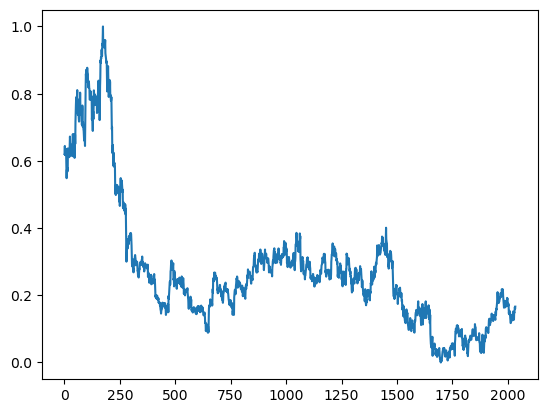

In [10]:
plt.plot(train_data)

### Creating data with Timesteps

When we are working with LSTM's, we need to keep the data in a specific format. Once the data is created in the form of 60 timesteps, we can then convert it into a Numpy array. Finally, the data is converted to a 3 dimensional array, 60 timeframes, and also one feature at each step.

In [11]:
len(train_data)

2035

In [12]:
X = []
y = []

for i in range(60, 2035):
    X.append(train_data[i-60:i,0])
    y.append(train_data[i,0])
    
X = np.array(X)
y = np.array(y)

In [13]:
X = X.reshape((X.shape[0], X.shape[1],1))

### Split the dataset into training and testing set

In [14]:
X_train = X[0:1700]
X_test = X[1700:]

y_train = y[0:1700]
y_test = y[1700:]

### Check the shape of X_train

In [15]:
X_train.shape

(1700, 60, 1)

### Import Sequential and layers from Keras

In [16]:
from tensorflow.keras import Sequential, layers

### Building an LSTM model with Keras

First, we add the keras LSTM layer, and following this, we add dropout layers for prevention against overfitting.

For the LSTM layer, we add 50 units that represent the dimensionality of outer space. The return_sequences parameter is set to true for returning the last output in output.

For addding dropout layers, we specify the percentage of layers that should be dropped. The next step is to add the dense layer.

In [17]:
model = Sequential()

model.add(layers.LSTM(50, return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(layers.Dropout(0.2))

model.add(layers.LSTM(50, return_sequences = True))
model.add(layers.Dropout(0.2))

model.add(layers.LSTM(50))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1))

### Check the summary of our model

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

### Compile the model

We compile the model with the help of adam optimizer. The error is computed using mean_squared_error.

In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Train the model

Finally, the model is fit using 100 epochs with a batch size of 32.

In [20]:
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
54/54 [==============================] - 9s 40ms/step - loss: 0.0126
Epoch 2/100
54/54 [==============================] - 3s 51ms/step - loss: 0.0026
Epoch 3/100
54/54 [==============================] - 3s 54ms/step - loss: 0.0026
Epoch 4/100
54/54 [==============================] - 3s 54ms/step - loss: 0.0029
Epoch 5/100
54/54 [==============================] - 3s 54ms/step - loss: 0.0026
Epoch 6/100
54/54 [==============================] - 3s 54ms/step - loss: 0.0022
Epoch 7/100
54/54 [==============================] - 3s 54ms/step - loss: 0.0022
Epoch 8/100
54/54 [==============================] - 3s 54ms/step - loss: 0.0019
Epoch 9/100
54/54 [==============================] - 3s 53ms/step - loss: 0.0018
Epoch 10/100
54/54 [==============================] - 3s 54ms/step - loss: 0.0020
Epoch 11/100
54/54 [==============================] - 3s 54ms/step - loss: 0.0021
Epoch 12/100
54/54 [==============================] - 3s 54ms/step - loss: 0.0018
Epoch 13/100
54/54 [=====

54/54 [==============================] - 3s 53ms/step - loss: 6.6381e-04
Epoch 99/100
54/54 [==============================] - 3s 53ms/step - loss: 5.7491e-04
Epoch 100/100
54/54 [==============================] - 3s 54ms/step - loss: 8.8724e-04


## Predicting future stock using the Test Set

In [21]:
predicted_stock_price = model.predict(X_test)

9/9 [==============================] - 2s 22ms/step


In [22]:
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

In [23]:
predicted_stock_price.shape

(275, 1)

In [24]:
y_test = y_test.reshape(275,1)

In [25]:
y_test = scaler.inverse_transform(y_test)

### Plotting the results

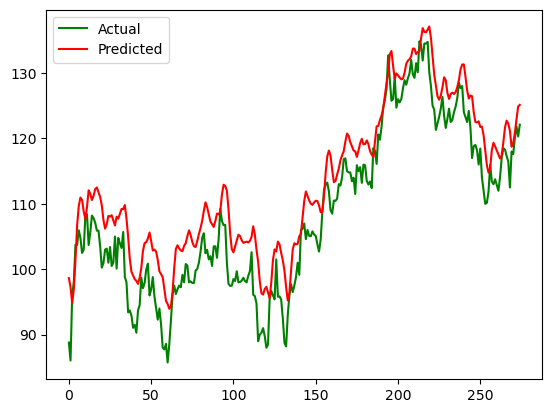

In [26]:
plt.plot(y_test, color = 'green', label = 'Actual')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted')
plt.legend()

***

***